In [370]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import deeplc
from deeplcretrainer import retrain
import os
import shutil

import pos_switch

from collections import Counter

import seaborn as sns

from collections import Counter
from copy import deepcopy

from matplotlib.ticker import MaxNLocator

import imp
imp.reload(pos_switch)

<module 'pos_switch' from 'K:\\positional_isomers\\pos_switch.py'>

In [2]:
models = [
    "models/full_hc_mod_deeplc_train_filtered_1fd8363d9af9dcad3be7553c39396960.hdf5",
    "models/full_hc_mod_deeplc_train_filtered_8c22d89667368f2f02ad996469ba157e.hdf5",
    "models/full_hc_mod_deeplc_train_filtered_cb975cfdd4105f97efa0b3afffe075cc.hdf5"
]

data_loc = "datasets/PXD005573_mcp.csv"

In [3]:
df = pd.read_csv(data_loc)
msk = np.random.rand(len(df)) <= 0.8

df[msk].to_csv("temp/pos_iso_train.csv")
df[~msk].to_csv("temp/pos_iso_eval.csv")

# Start retrain

In [4]:
from deeplcretrainer import retrain

models = [
    "models/full_hc_mod_deeplc_train_filtered_1fd8363d9af9dcad3be7553c39396960.hdf5",
    "models/full_hc_mod_deeplc_train_filtered_8c22d89667368f2f02ad996469ba157e.hdf5",
    "models/full_hc_mod_deeplc_train_filtered_cb975cfdd4105f97efa0b3afffe075cc.hdf5"
]

retrain(
    datasets=["temp/pos_iso_train.csv"],
    mods_transfer_learning=models,
    n_epochs=5,
    batch_size=128,
    ratio_test=0.9,
    ratio_valid=0.95,
    freeze_layers=False,
    outpath="temp/"
)

K:\positional_isomers\cnn_functions.py:709: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train = df.loc[ids_train]
K:\positional_isomers\cnn_functions.py:710: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test = df.loc[ids_test]
K:\positional_isomers\cnn_functions.py:709: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_train = df.loc[ids_train]
K:\positional_isomers\cnn_functions.py:710: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test = df.loc[ids_test]


Epoch 1/5
605/605 [==============================] - 19s 24ms/step - loss: 0.1860 - mean_absolute_error: 0.1612 - val_loss: 0.1347 - val_mean_absolute_error: 0.1107
Epoch 2/5
605/605 [==============================] - 13s 22ms/step - loss: 0.1381 - mean_absolute_error: 0.1145 - val_loss: 0.1255 - val_mean_absolute_error: 0.1022
Epoch 3/5
605/605 [==============================] - 13s 22ms/step - loss: 0.1279 - mean_absolute_error: 0.1050 - val_loss: 0.1239 - val_mean_absolute_error: 0.1012
Epoch 4/5
605/605 [==============================] - 13s 22ms/step - loss: 0.1242 - mean_absolute_error: 0.1017 - val_loss: 0.1200 - val_mean_absolute_error: 0.0976
Epoch 5/5
605/605 [==============================] - 13s 22ms/step - loss: 0.1219 - mean_absolute_error: 0.0996 - val_loss: 0.1216 - val_mean_absolute_error: 0.0995
Epoch 1/5
605/605 [==============================] - 18s 25ms/step - loss: 0.1900 - mean_absolute_error: 0.1582 - val_loss: 0.1398 - val_mean_absolute_error: 0.1096
Epoch 2/5


In [5]:
trained_models = []
for f in os.listdir("./"):
    if f.endswith(".hdf5"):
        trained_models.append(f)

reset config TF

In [6]:
import tensorflow as tf
from tensorflow.python.eager import context

_ = tf.Variable([1])
context._context = None
context._create_context()
tf.config.threading.set_inter_op_parallelism_threads(1)

In [181]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

df = pd.read_csv("temp/pos_iso_eval.csv",index_col=0)
df.fillna("",inplace=True)

df_train = pd.read_csv("temp/pos_iso_train.csv",index_col=0)
df_train.fillna("",inplace=True)

dlc = deeplc.DeepLC(
    path_model=trained_models,
    cnn_model=True,
    pygam_calibration=True,
    verbose=True,
    batch_num=25000
)

dlc.calibrate_preds(seq_df=df_train)

4/4 [==============================] - 1s 179ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)
C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:78: UserWarning: Could not import Scikit-Sparse or Suite-Sparse.
This will slow down optimization for models with monotonicity/convexity penalties and many splines.
See installation instructions for installing Scikit-Sparse and Suite-Sparse via Conda.
  warnings.warn(msg)


5/5 [==============================] - 1s 124ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 124ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 123ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 124ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 129ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)
C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:78: UserWarning: Could not import Scikit-Sparse or Suite-Sparse.
This will slow down optimization for models with monotonicity/convexity penalties and many splines.
See installation instructions for installing Scikit-Sparse and Suite-Sparse via Conda.
  warnings.warn(msg)


5/5 [==============================] - 1s 93ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 96ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 96ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 96ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 176ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)
C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:78: UserWarning: Could not import Scikit-Sparse or Suite-Sparse.
This will slow down optimization for models with monotonicity/convexity penalties and many splines.
See installation instructions for installing Scikit-Sparse and Suite-Sparse via Conda.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 111ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 115ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 111ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 110ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)
C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:78: UserWarning: Could not import Scikit-Sparse or Suite-Sparse.
This will slow down optimization for models with monotonicity/convexity penalties and many splines.
See installation instructions for installing Scikit-Sparse and Suite-Sparse via Conda.
  warnings.warn(msg)


5/5 [==============================] - 1s 119ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 110ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 115ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


In [38]:
preds_cal = dlc.make_preds(seq_df=df)

5/5 [==============================] - 1s 111ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


In [105]:
imp.reload(pos_switch)
import copy
all_aa = "ACDEFGHIKLMNPQRSTVWY"
for mut in all_aa:
    df_copy = copy.deepcopy(df)
    preds_cal = dlc.make_preds(seq_df=df_copy)
    df_copy["orig_seq"] = df_copy["seq"]
    df_copy[["seq","sel_pos","aa_sw1","aa_sw2"]] = df_copy["seq"].apply(pos_switch.mutate_aa,mutate_to=mut)
    preds_cal_switched = dlc.make_preds(seq_df=df_copy)

    df_copy["preds_switched"] = preds_cal_switched
    df_copy["preds"] = preds_cal

    df_copy["preds_error"] = abs(df_copy["preds"]-df_copy["tr"])
    df_copy["preds_switched_error"] = abs(df_copy["preds_switched"]-df_copy["tr"])
    
    df_copy.to_csv("middle_mut_aa_%s.csv" % (mut))

5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 115ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 115ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 111ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 111ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 115ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 111ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 110ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 110ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 110ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 110ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 132ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 111ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


In [ ]:
imp.reload(pos_switch)

for num_switch in range(2,7):
    df_copy = copy.deepcopy(df)
    preds_cal = dlc.make_preds(seq_df=df_copy)
    df_copy["orig_seq"] = df_copy["seq"]
    df_copy[["seq","aa_sw1","aa_sw2"]] = df_copy["seq"].apply(pos_switch.switch_pos_center,rev_length=num_switch)
    preds_cal_switched = dlc.make_preds(seq_df=df_copy)

    df_copy["preds_switched"] = preds_cal_switched
    df_copy["preds"] = preds_cal

    df_copy["preds_error"] = abs(df_copy["preds"]-df_copy["tr"])
    df_copy["preds_switched_error"] = abs(df_copy["preds_switched"]-df_copy["tr"])
    
    df_copy.to_csv("middle_switch_num_%s.csv" % (num_switch))

In [143]:
imp.reload(pos_switch)

for num_switch in range(2,7):
    df_copy = copy.deepcopy(df)
    preds_cal = dlc.make_preds(seq_df=df_copy)
    df_copy["orig_seq"] = df_copy["seq"]
    df_copy[["seq","aa_sw1","aa_sw2"]] = df_copy["seq"].apply(pos_switch.switch_pos_center,rev_length=num_switch,pos_switch="left")
    preds_cal_switched = dlc.make_preds(seq_df=df_copy)

    df_copy["preds_switched"] = preds_cal_switched
    df_copy["preds"] = preds_cal

    df_copy["preds_error"] = abs(df_copy["preds"]-df_copy["tr"])
    df_copy["preds_switched_error"] = abs(df_copy["preds_switched"]-df_copy["tr"])
    
    df_copy.to_csv("left_switch_num_%s.csv" % (num_switch))

5/5 [==============================] - 1s 116ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 111ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 115ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 137ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


In [144]:
imp.reload(pos_switch)

for num_switch in range(2,7):
    df_copy = copy.deepcopy(df)
    preds_cal = dlc.make_preds(seq_df=df_copy)
    df_copy["orig_seq"] = df_copy["seq"]
    df_copy[["seq","aa_sw1","aa_sw2"]] = df_copy["seq"].apply(pos_switch.switch_pos_center,rev_length=num_switch,pos_switch="right")
    preds_cal_switched = dlc.make_preds(seq_df=df_copy)

    df_copy["preds_switched"] = preds_cal_switched
    df_copy["preds"] = preds_cal

    df_copy["preds_error"] = abs(df_copy["preds"]-df_copy["tr"])
    df_copy["preds_switched_error"] = abs(df_copy["preds_switched"]-df_copy["tr"])
    
    df_copy.to_csv("right_switch_num_%s.csv" % (num_switch))

5/5 [==============================] - 1s 111ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 111ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 115ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


5/5 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


In [275]:
imp.reload(pos_switch)
import math
from itertools import permutations
from tqdm import tqdm

def get_all_combs(row,rev_length=2,pos_switch="middle"):
    seq = row["seq"]
    
    if pos_switch == "middle":
        sel_pos = int(len(seq)/2)
    if pos_switch == "left":
        sel_pos = int(int(len(seq)/2)/2)
    if pos_switch == "right":
        sel_pos = int(len(seq)/2)+int(int(len(seq)/2)/2)
    
    sel_seq = seq[sel_pos-math.ceil(rev_length/2)+1:sel_pos+int(rev_length/2)+1]
    
    all_combs = ["".join(v) for v in permutations(sel_seq,rev_length)]

    ret_dict = {}
    for idx,v in enumerate(all_combs):
        new_seq = seq[:sel_pos-math.ceil(rev_length/2)+1]+v+seq[sel_pos+int(rev_length/2)+1:]
        if v == sel_seq:
            ret_dict[idx] = {"seq":new_seq,
                             "modifications":row["modifications"],
                             "orig_seq": seq+str(row["modifications"]),
                             "aa_sw1":sel_seq,
                             "aa_sw2":v,
                             "tr":row["tr"],
                             "decoy":0}
            continue
        ret_dict[idx] = {"seq":new_seq,
                         "modifications":row["modifications"],
                         "orig_seq": seq+str(row["modifications"]),
                         "aa_sw1":sel_seq,
                         "aa_sw2":v,
                         "tr":row["tr"],
                         "decoy":1}

    return pd.DataFrame(ret_dict).T

for num_switch in range(4,5):
    df_copy = copy.deepcopy(df)
    #preds_cal = dlc.make_preds(seq_df=df_copy)
    #df_copy["orig_seq"] = df_copy["seq"]
    
    all_df = []
    for idx,row in df_copy.iterrows():
        all_df.append(get_all_combs(row,rev_length=num_switch))
    all_df = pd.concat(all_df).reset_index(drop=True)
    preds_cal = dlc.make_preds(seq_df=all_df)
    break
    #print(df_copy["seq"].apply(get_all_combs,rev_length=num_switch))

4/4 [==============================] - 1s 110ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 115ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 115ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 115ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 114ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 117ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 110ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 113ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 115ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 112ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


4/4 [==============================] - 1s 111ms/step


C:\Users\robbin\anaconda3\envs\py310\lib\site-packages\pygam\utils.py:113: UserWarning: Expected 2D input data array, but found 1D. Expanding to 2D.
  warnings.warn(msg)


In [276]:
all_df["predictions"] = preds_cal

In [277]:
all_df["abs_error"] = abs(all_df["tr"] - all_df["predictions"])

In [278]:
all_ranks = []

for s in tqdm(set(all_df["orig_seq"])):
    subsel = deepcopy(all_df[all_df["orig_seq"] == s])
    subsel.sort_values("abs_error",inplace=True)
    subsel.loc[subsel.index,"rank"] = list(range(1,len(subsel)+1))
    try:
        all_ranks.append(int(subsel.loc[subsel["decoy"] == 0,"rank"]))
    except:
        all_ranks.append(int(subsel.loc[subsel["decoy"] == 0,"rank"].iloc[0]))


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22734/22734 [13:43<00:00, 27.60it/s]


In [409]:
count_ranks = Counter(all_ranks)
all_count = sum(count_ranks.values())
prev = 0.0
cummulative = []
for i in range(1,24):
    cummulative.append(((count_ranks[i]/all_count)+prev)*100)
    prev = (count_ranks[i]/all_count)+prev

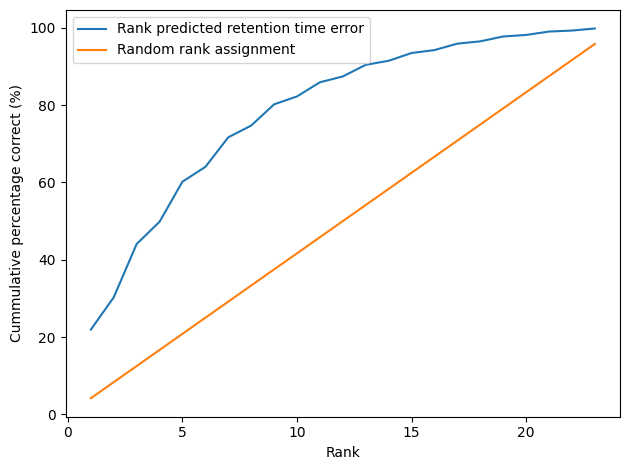

In [415]:
plt.plot(range(1,24),cummulative,label="Rank predicted retention time error")
plt.plot(range(1,24),[(v*(1/24))*100 for v in range(1,24)],label="Random rank assignment")

plt.xlabel("Rank")
plt.ylabel("Cummulative percentage correct (%)")
plt.legend()
plt.tight_layout()
plt.savefig("figs/rank_eval.svg")
plt.show()

In [ ]:
better_swap = sum(df["preds_error"]>df["preds_switched_error"])
better_orig = sum(df["preds_error"]<df["preds_switched_error"])
total = better_orig+better_swap

# Start plotting!

In [145]:
# Seems something in the retrainer messes up the matplotlib backend? Re-init.
%matplotlib inline

In [356]:
elution_length = abs(-65-max(df_train["tr"]))
min_tr = -65
max_tr = max(df_train["tr"])

In [357]:
all_dfs = []
all_dfs_left = []
all_dfs_right = []

for f in os.listdir("."):
    if not f.endswith(".csv"):
        continue
    if not "middle_switch" in f:
        continue
    all_dfs.append(pd.read_csv(f,dtype={"aa_sw1":str}).fillna(""))
    
for f in os.listdir("."):
    if not f.endswith(".csv"):
        continue
    if not "left_switch" in f:
        continue
    all_dfs_left.append(pd.read_csv(f,dtype={"aa_sw1":str}).fillna(""))

for f in os.listdir("."):
    if not f.endswith(".csv"):
        continue
    if not "right_switch" in f:
        continue
    all_dfs_right.append(pd.read_csv(f,dtype={"aa_sw1":str}).fillna(""))
    
dfs = pd.concat(all_dfs)
dfs_left = pd.concat(all_dfs_left)
dfs_right = pd.concat(all_dfs_right)

In [358]:
dfs["len_switch"] = dfs["aa_sw1"].apply(len)
dfs_left["len_switch"] = dfs_left["aa_sw1"].apply(len)
dfs_right["len_switch"] = dfs_right["aa_sw1"].apply(len)
dfs_right["len_seq"] = dfs_right["seq"].apply(len)
dfs_left["len_seq"] = dfs_right["seq"].apply(len)
dfs["len_seq"] = dfs["seq"].apply(len)

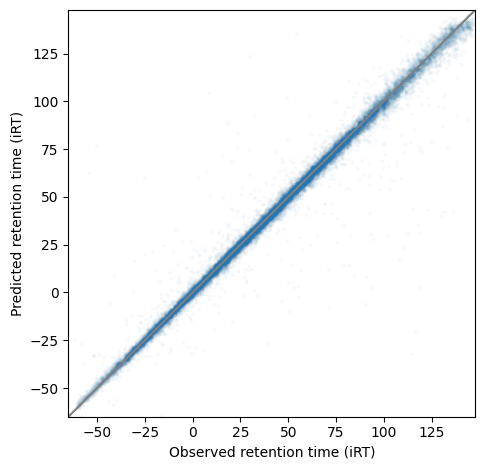

In [416]:
dfs_subsel = dfs[dfs["len_switch"] == 2]
plt.scatter(dfs_subsel["tr"],dfs_subsel["preds"],s=3,alpha=0.025)
plt.plot([min_tr,max_tr],[min_tr,max_tr],c="grey")

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlim(min_tr,max_tr)
plt.ylim(min_tr,max_tr)

plt.xlabel("Observed retention time (iRT)")
plt.ylabel("Predicted retention time (iRT)")

plt.tight_layout()
plt.savefig("figs/perf_overall.svg")
plt.show()

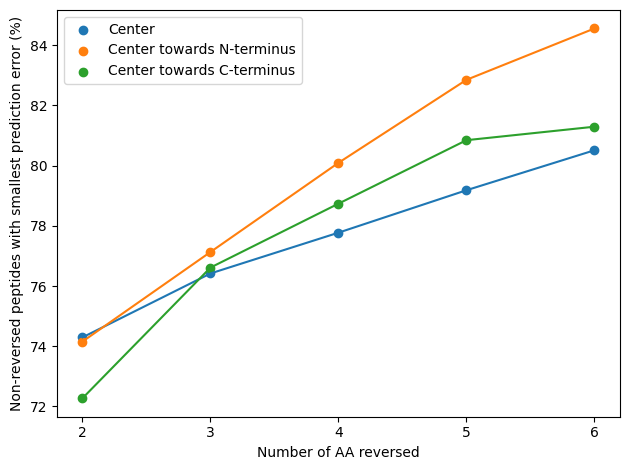

In [417]:
x_coords = []
x_coords_right = []
x_coords_left = []

for i in range(2,7):
    dfs_subsel = dfs[dfs["len_switch"] == i]
    dfs_subsel_left = dfs_left[dfs_left["len_switch"] == i]
    dfs_subsel_right = dfs_right[dfs_right["len_switch"] == i]
    
    better_swap = sum(dfs_subsel["preds_error"]>dfs_subsel["preds_switched_error"])
    better_orig = sum(dfs_subsel["preds_error"]<dfs_subsel["preds_switched_error"])
    total = better_orig+better_swap
    
    better_swap_left = sum(dfs_subsel_left["preds_error"]>dfs_subsel_left["preds_switched_error"])
    better_orig_left = sum(dfs_subsel_left["preds_error"]<dfs_subsel_left["preds_switched_error"])
    total_left = better_orig_left+better_swap_left
    
    better_swap_right = sum(dfs_subsel_right["preds_error"]>dfs_subsel_right["preds_switched_error"])
    better_orig_right = sum(dfs_subsel_right["preds_error"]<dfs_subsel_right["preds_switched_error"])
    total_right = better_orig_right+better_swap_right
    
    x_coords.append((better_orig/total)*100)
    x_coords_left.append((better_orig_left/total_left)*100)
    x_coords_right.append((better_orig_right/total_right)*100)
    

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.plot(list(range(2,7)),x_coords,label="")
plt.scatter(list(range(2,7)),x_coords,label="Center")

plt.plot(list(range(2,7)),x_coords_left,label="")
plt.scatter(list(range(2,7)),x_coords_left,label="Center towards N-terminus")

plt.plot(list(range(2,7)),x_coords_right,label="")
plt.scatter(list(range(2,7)),x_coords_right,label="Center towards C-terminus")

plt.legend()

plt.ylabel("Non-reversed peptides with smallest prediction error (%)")
plt.xlabel("Number of AA reversed")

plt.tight_layout()
plt.savefig("figs/rev_ident.svg")
plt.show()

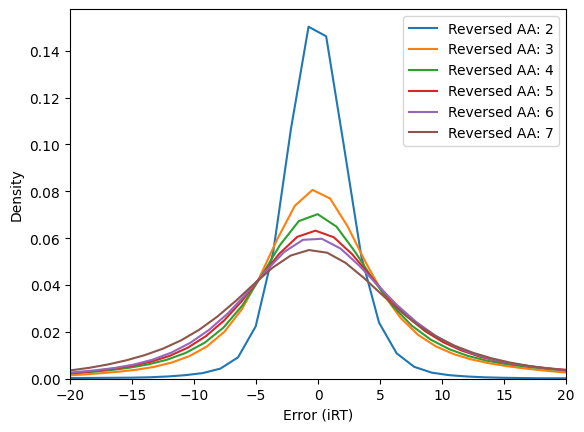

In [418]:
for i,v in enumerate(all_errors):
    sns.kdeplot(v,bw_adjust=2,label=f"Reversed AA: {i+2}")

plt.xlabel("Error (iRT)")
plt.legend()
plt.xlim(-20,20)
plt.savefig("figs/eval_rev_density.svg")
plt.show()

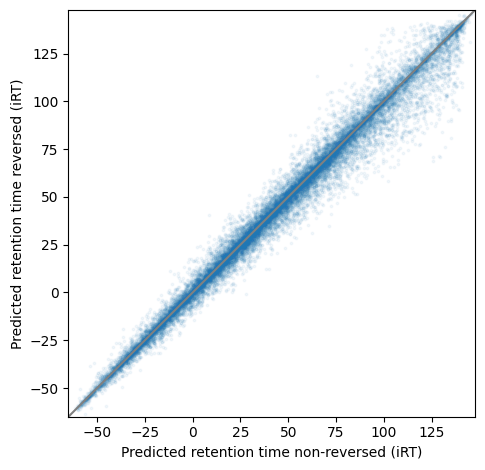

In [419]:
dfs_subsel = dfs[dfs["len_switch"] == 2]
plt.scatter(dfs_subsel["preds"],dfs_subsel["preds_switched"],s=3,alpha=0.05)

plt.plot([min_tr,max_tr],[min_tr,max_tr],c="grey")

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlim(min_tr,max_tr)
plt.ylim(min_tr,max_tr)

plt.xlabel("Predicted retention time non-reversed (iRT)")
plt.ylabel("Predicted retention time reversed (iRT)")

plt.tight_layout()
plt.savefig("figs/comp_rev.svg")
plt.show()

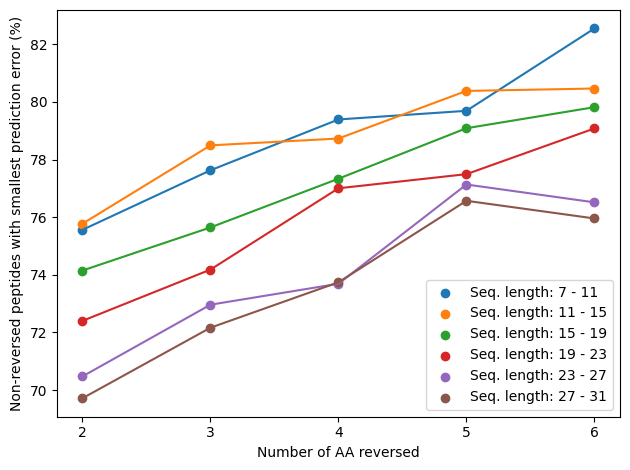

In [421]:
x_coords_all = []
sel_dist = 4
for j in range(min(dfs["len_seq"]),30,sel_dist):
    x_coords = []
    for i in range(2,7):    
        dfs_subsel = dfs[(dfs["len_switch"] == i) & ((dfs["len_seq"] >= j)  & (dfs["len_seq"] <= j+sel_dist))]

        better_swap = sum(dfs_subsel["preds_error"]>dfs_subsel["preds_switched_error"])
        better_orig = sum(dfs_subsel["preds_error"]<dfs_subsel["preds_switched_error"])
        total = better_orig+better_swap

        x_coords.append((better_orig/total)*100)
    x_coords_all.append([j,x_coords])


ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        
for j,coords in x_coords_all:
    plt.plot(list(range(2,7)),coords,label=f"")
    plt.scatter(list(range(2,7)),coords,label=f"Seq. length: {j} - {j+sel_dist}")

plt.ylabel("Non-reversed peptides with smallest prediction error (%)")
plt.xlabel("Number of AA reversed")

plt.legend()
plt.tight_layout()
plt.savefig("figs/length_eval.svg")
plt.show()

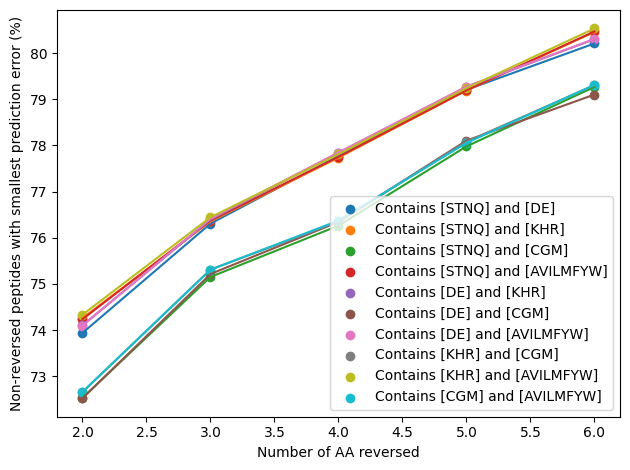

In [420]:
def contains_aa(seq, aa_group):
    return True in [c in seq for c in aa_group]

aa_groups = ["STNQ","DE","KHR","CGM","AVILMFYW"]
x_coords_all = []
analyzed = []

for aa_group in aa_groups:
    for aa_group2 in aa_groups:
        x_coords = []
        for i in range(2,7):    
            if aa_group == aa_group2:
                continue
            if aa_group+aa_group2 in analyzed:
                continue
            dfs_subsel = dfs[(dfs["len_switch"] == i)]
            dfs_subsel = dfs_subsel[dfs_subsel["seq"].apply(contains_aa,aa_group=aa_group)]
            dfs_subsel = dfs_subsel[dfs_subsel["seq"].apply(contains_aa,aa_group=aa_group2)]
            better_swap = sum(dfs_subsel["preds_error"]>dfs_subsel["preds_switched_error"])
            better_orig = sum(dfs_subsel["preds_error"]<dfs_subsel["preds_switched_error"])
            total = better_orig+better_swap
            
            x_coords.append((better_orig/total)*100)
            

        if aa_group == aa_group2:
            continue
        if x_coords == []:
            continue
        x_coords_all.append([[aa_group,aa_group2],x_coords])
        
        analyzed.append(aa_group+aa_group2)
        analyzed.append(aa_group2+aa_group)

for j,coords in x_coords_all:
    j1,j2 = j
    plt.plot(list(range(2,7)),coords,label=f"")
    plt.scatter(list(range(2,7)),coords,label=f"Contains [{j1}] and [{j2}]")

plt.legend()

plt.ylabel("Non-reversed peptides with smallest prediction error (%)")
plt.xlabel("Number of AA reversed")

plt.tight_layout()
plt.savefig("figs/aa_eval.svg")
plt.show()

In [154]:
all_dfs = []
for f in os.listdir("."):
    if not f.endswith(".csv"):
        continue
    if not "middle_mut" in f:
        continue
    print(pd.read_csv(f,dtype={"aa_sw1":str}).fillna(""))
    all_dfs.append(pd.read_csv(f,dtype={"aa_sw1":str}).fillna(""))

dfs = pd.concat(all_dfs)

       Unnamed: 0                                     seq modifications  \
0               6                            GPNGAIAELGPR                 
1               8  KEGITGPPADSSKPIGPDDAIDALSSDFTCGSPTAAGK                 
2              16                        VGLSGAPAAACSTAQK                 
3              21                               TLSDADIQK                 
4              29                             YATSCASCCPR                 
...           ...                                     ...           ...   
22731      113200                         YFLVGAGAIGCELLK                 
22732      113202                           DYSHYYATIEDLR                 
22733      113207                             WSDVAALEGAK                 
22734      113208         IAPALCCGNTVVIKPAEQTPLSALYMGALIK  25|Oxidation   
22735      113212            GQDMETEAHQNKLEAMINELAVAMTAVK                 

               tr                                orig_seq  sel_pos aa_sw1  \
0       52.547034     

       Unnamed: 0                                     seq modifications  \
0               6                            GPNGAIFELGPR                 
1               8  KEGITGPPADSSKPIGPDDFIDALSSDFTCGSPTAAGK                 
2              16                        VGLSGAPAFACSTAQK                 
3              21                               TLSDFDIQK                 
4              29                             YATSCFSCCPR                 
...           ...                                     ...           ...   
22731      113200                         YFLVGAGFIGCELLK                 
22732      113202                           DYSHYYFTIEDLR                 
22733      113207                             WSDVAFLEGAK                 
22734      113208         IAPALCCGNTVVIKPFEQTPLSALYMGALIK  25|Oxidation   
22735      113212            GQDMETEAHQNKLEFMINELAVAMTAVK                 

               tr                                orig_seq  sel_pos aa_sw1  \
0       52.547034     

       Unnamed: 0                                     seq modifications  \
0               6                            GPNGAIKELGPR                 
1               8  KEGITGPPADSSKPIGPDDKIDALSSDFTCGSPTAAGK                 
2              16                        VGLSGAPAKACSTAQK                 
3              21                               TLSDKDIQK                 
4              29                             YATSCKSCCPR                 
...           ...                                     ...           ...   
22731      113200                         YFLVGAGKIGCELLK                 
22732      113202                           DYSHYYKTIEDLR                 
22733      113207                             WSDVAKLEGAK                 
22734      113208         IAPALCCGNTVVIKPKEQTPLSALYMGALIK  25|Oxidation   
22735      113212            GQDMETEAHQNKLEKMINELAVAMTAVK                 

               tr                                orig_seq  sel_pos aa_sw1  \
0       52.547034     

       Unnamed: 0                                     seq modifications  \
0               6                            GPNGAIPELGPR                 
1               8  KEGITGPPADSSKPIGPDDPIDALSSDFTCGSPTAAGK                 
2              16                        VGLSGAPAPACSTAQK                 
3              21                               TLSDPDIQK                 
4              29                             YATSCPSCCPR                 
...           ...                                     ...           ...   
22731      113200                         YFLVGAGPIGCELLK                 
22732      113202                           DYSHYYPTIEDLR                 
22733      113207                             WSDVAPLEGAK                 
22734      113208         IAPALCCGNTVVIKPPEQTPLSALYMGALIK  25|Oxidation   
22735      113212            GQDMETEAHQNKLEPMINELAVAMTAVK                 

               tr                                orig_seq  sel_pos aa_sw1  \
0       52.547034     

       Unnamed: 0                                     seq modifications  \
0               6                            GPNGAITELGPR                 
1               8  KEGITGPPADSSKPIGPDDTIDALSSDFTCGSPTAAGK                 
2              16                        VGLSGAPATACSTAQK                 
3              21                               TLSDTDIQK                 
4              29                             YATSCTSCCPR                 
...           ...                                     ...           ...   
22731      113200                         YFLVGAGTIGCELLK                 
22732      113202                           DYSHYYTTIEDLR                 
22733      113207                             WSDVATLEGAK                 
22734      113208         IAPALCCGNTVVIKPTEQTPLSALYMGALIK  25|Oxidation   
22735      113212            GQDMETEAHQNKLETMINELAVAMTAVK                 

               tr                                orig_seq  sel_pos aa_sw1  \
0       52.547034     

In [155]:
all_aa = "ACDEFGHIKLMNPQRSTVWY"
dist_matrix = {}
for aa1 in all_aa:
    dist_matrix[aa1] = {}
    for aa2 in all_aa:
        df_subsel = dfs[(dfs["aa_sw1"] == aa1) & (dfs["aa_sw2"] == aa2)]
        dist_matrix[aa1][aa2] = sum(df_subsel["preds"] - df_subsel["preds_switched"])/len(df_subsel.index)
        #plt.scatter(df_subsel["preds"], df_subsel["preds_switched"])
        #plt.show()
        print(aa1,aa2,sum(df_subsel["preds"] - df_subsel["preds_switched"])/len(df_subsel.index))

A A 3.8312602614160706e-08
A C 4.483452686122807
A D 3.3351979698102605
A E 1.7026926116335634
A F -26.86384063724947
A G 7.2272756653276105
A H 24.657606609211502
A I -20.430451171119756
A K 23.607974133519907
A L -23.270599569203434
A M -14.09340333941625
A N 8.666896661909812
A P 1.4112656454031092
A Q 6.457829185914085
A R 21.525550256176995
A S 6.128173445840723
A T 2.8090128995875725
A V -11.464234529038412
A W -29.802424647634275
A Y -10.053905743955152
C A -4.599811534053015
C C 1.2780310359764133e-07
C D -1.2938313711021663
C E -2.6078604291509078
C F -29.90579564306049
C G 2.1737702160849253
C H 19.764757059333895
C I -23.68052571476138
C K 18.563344008248354
C L -26.359833208479785
C M -17.780238723183135
C N 3.8928244240925602
C P -3.3642604183828753
C Q 1.874807697167101
C R 16.779671176753908
C S 1.3196679244895702
C T -1.8347406073772567
C V -15.290077379929542
C W -32.362200773874434
C Y -13.485340551367194
D A -2.486235219200266
D C 1.4404313101772315
D D 3.42179834370

V T 14.7854409026383
V V -7.104757573378269e-08
V W -19.111732373975503
V Y 1.4963472314865827
W A 32.28733408395432
W C 35.357416202214374
W D 34.30051302118433
W E 33.44652261000169
W F 3.3259717710762358
W G 37.94979758356847
W H 54.398760917856166
W I 10.792071961251862
W K 54.464918174306504
W L 7.767922712658776
W M 17.74347603305645
W N 39.411368953952156
W P 30.17238134457408
W Q 37.82355210634422
W R 51.91157132869859
W S 37.56511742033228
W T 34.49168356299948
W V 20.39614239606545
W W -2.747337554790662e-07
W Y 20.856151867720452
Y A 10.4095105892956
Y C 14.81815628550318
Y D 13.93244898011007
Y E 12.297795913379131
Y F -17.163930050669023
Y G 17.507077673631752
Y H 34.81367907528613
Y I -10.352395107100445
Y K 33.90906433608212
Y L -13.262776234893927
Y M -3.825700327275701
Y N 19.11073208725014
Y P 10.499767928844324
Y Q 17.093960500907663
Y R 31.79990522384595
Y S 16.61481667621439
Y T 13.153837173346238
Y V -1.3157807019070469
Y W -19.926642169258166
Y Y 1.95588622917225

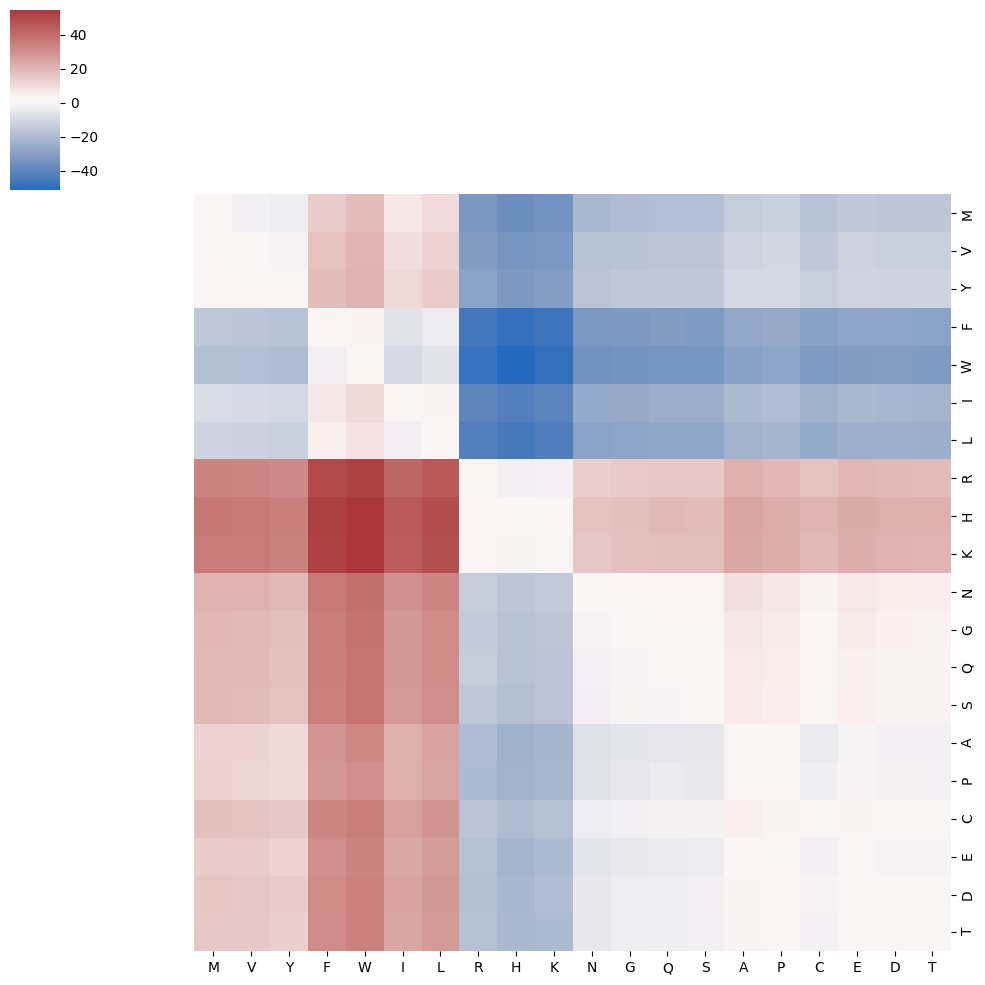

In [157]:
cg = sns.clustermap(pd.DataFrame(dist_matrix)[list("MVYFWILRHKNGQSAPCEDT")], cmap="vlag",col_cluster=False)
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
plt.savefig("Mutation_fig.svg")


20

In [ ]:
all_errors = [dfs_subsel["tr"]-dfs_subsel["preds"]]

for i in range(2,7):
    dfs_subsel = dfs[dfs["len_switch"] == i]
    all_errors.append(dfs_subsel["tr"]-dfs_subsel["preds_switched"])
    
plt.boxplot(all_errors)
plt.ylim(-20,20)
plt.show()

In [ ]:
plt.scatter(df["tr"],preds_cal_switched,s=1,alpha=0.05)
plt.show()
plt.scatter(df["tr"],preds_cal,s=1,alpha=0.05)
plt.show()

In [ ]:
plt.scatter(preds_cal_switched,preds_cal,s=1,alpha=0.05)
plt.plot([-50,150],[-50,150],c="grey")
plt.show()

In [ ]:
df

In [ ]:
df["diff_preds"] = df["preds"]-df["preds_switched"]

In [ ]:
from_aa_to_diff = {}
impact_aa_diff = {}
aa_pos = set(df["aa_sw1"])
for aa in aa_pos:
    for aa2 in aa_pos:
        from_aa_to_diff["%s|%s" % (aa,aa2)] = df[(df["aa_sw1"] == aa) & (df["aa_sw2"] == aa2)]["diff_preds"]
        try:
            impact_aa_diff["%s|%s" % (aa,aa2)] = sum(abs(from_aa_to_diff["%s|%s" % (aa,aa2)]))/len(from_aa_to_diff["%s|%s" % (aa,aa2)])
        except:
            pass

In [ ]:
aa_sel = [k for k,v in impact_aa_diff.items() if v > 8]
print(aa_sel)
#plt.scatter(impact_aa_diff.values(),range(0,len(impact_aa_diff.values())))
#plt.boxplot(from_aa_to_diff.values())

In [ ]:
plt.boxplot([from_aa_to_diff[k] for k in aa_sel])
plt.show()

In [ ]:
below = df[df["diff_preds"] < -2.0]
middle = df[(df["diff_preds"] <= 2.0) & (df["diff_preds"] >= -2.0)]
above = df[df["diff_preds"] > 2.0]

In [ ]:
occ_dict = {}
occ_dict["aa_sw1_below"] = dict(Counter(below["aa_sw1"]))
occ_dict["aa_sw2_below"] = dict(Counter(below["aa_sw2"]))
occ_dict["aa_sw1_above"] = dict(Counter(above["aa_sw1"]))
occ_dict["aa_sw2_above"] = dict(Counter(above["aa_sw2"]))
occ_dict["aa_sw1_middle"] = dict(Counter(middle["aa_sw1"]))
occ_dict["aa_sw2_middle"] = dict(Counter(middle["aa_sw2"]))
occ_dict["aa_sw1_all"] = dict(Counter(df["aa_sw1"]))
occ_dict["aa_sw2_all"] = dict(Counter(df["aa_sw2"]))

In [ ]:
occ_df = pd.DataFrame(occ_dict)

In [ ]:
occ_df/occ_df.max(axis=0)

In [ ]:
plt.boxplot([df["preds_error"],df["preds_switched_error"]])
plt.ylim(0,25)
plt.show()

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Original best', 'Swapped middle two AA best'
sizes = [better_orig/total, better_swap/total]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
df["length"] = df["seq"].apply(len)

In [ ]:
for i in range(7,35):
    sub_df = df[df["length"] == i]
    print(i,sum(sub_df["preds_error"] > sub_df["preds_switched_error"])/sum(sub_df["preds_error"] < sub_df["preds_switched_error"]))

In [ ]:
plt.scatter(get_predicted_spectrum(df["seq"].loc[113192],"-",2)[1],get_predicted_spectrum(df["orig_seq"].loc[113192],"-",2)[1])

In [ ]:
!pip install spectrum_utils

In [ ]:
#shutil.rmtree('temp/')
#os.mkdir("temp/")